In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import os

In [2]:
print(os.getcwd())

c:\Users\HP\Desktop\Machine Learning Programing with prajwal


In [3]:
os.getcwd()

'c:\\Users\\HP\\Desktop\\Machine Learning Programing with prajwal'

In [4]:
os.chdir('C:\\Users\\HP\\Documents\\Batch 93 Day29\\Batch 93 Day29\\')

In [5]:
os.getcwd()

'C:\\Users\\HP\\Documents\\Batch 93 Day29\\Batch 93 Day29'

In [6]:
data=pd.read_csv('Hitters.csv')
df_hitters=data.copy()
display(df_hitters)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [7]:
print(df_hitters.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [8]:
# Describe Data

display(df_hitters.describe())

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [9]:
# Display Categorical variable unique Values

print('The league types are: ',df_hitters['League'].unique())

The league types are:  ['A' 'N']


In [10]:
print('The division type are:',df_hitters['Division'].unique())

The division type are: ['E' 'W']


In [11]:
print('The newLeague type are:',df_hitters['NewLeague'].unique())

The newLeague type are: ['A' 'N']


In [12]:
# One hot encoding of Categorical Variable
df_hitters_num=pd.get_dummies(df_hitters,columns=['League','Division','NewLeague'],drop_first=True)
display(df_hitters_num)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN,False,False,False
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,True,True,True
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,False,True,False
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,True,False,True
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3,700.0,True,False,True
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20,875.0,False,False,False
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7,385.0,False,True,False
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12,960.0,False,False,False


In [13]:
df_hitters_num=pd.get_dummies(df_hitters,columns=['League','Division','NewLeague'],dtype=int,drop_first=True)
display(df_hitters_num)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN,0,0,0
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3,700.0,1,0,1
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20,875.0,0,0,0
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7,385.0,0,1,0
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12,960.0,0,0,0


In [14]:
# Check For Null Values

display(df_hitters.isna().sum())

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [15]:
# Display Shape
display(df_hitters_num.shape)

(322, 20)

In [16]:
# Delete the records where Salary is Null
df_hitters_num_nonull=df_hitters_num.dropna()
print(df_hitters_num_nonull.isnull().sum())

AtBat          0
Hits           0
HmRun          0
Runs           0
RBI            0
Walks          0
Years          0
CAtBat         0
CHits          0
CHmRun         0
CRuns          0
CRBI           0
CWalks         0
PutOuts        0
Assists        0
Errors         0
Salary         0
League_N       0
Division_W     0
NewLeague_N    0
dtype: int64


In [17]:
#Display Shape

print(df_hitters_num_nonull.shape)

(263, 20)


In [18]:
322-59

263

In [19]:
print(df_hitters_num.shape)

(322, 20)


In [20]:
df_hitters_num_nonull

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,1,0,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3,700.0,1,0,1
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20,875.0,0,0,0
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7,385.0,0,1,0
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12,960.0,0,0,0


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


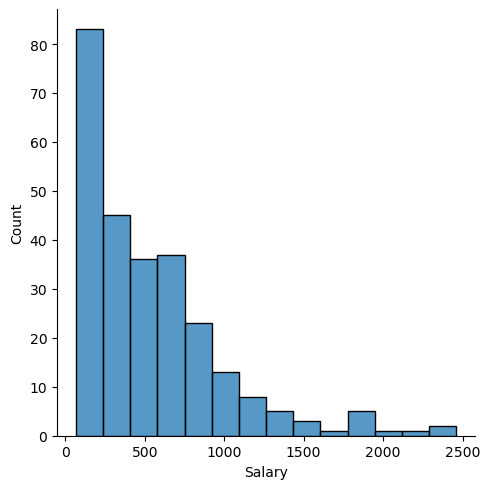

In [21]:
# Displot of salary columns
sns.displot(df_hitters_num_nonull['Salary']);

In [22]:
# Display the correlation betweeen the dependent and independent variables
correlation=df_hitters_num_nonull.corr()
correlation['Salary'].sort_values(ascending=True)


Division_W    -0.192514
League_N      -0.014282
Errors        -0.005401
NewLeague_N   -0.002834
Assists        0.025436
PutOuts        0.300480
HmRun          0.343028
AtBat          0.394771
Years          0.400657
Runs           0.419859
Hits           0.438675
Walks          0.443867
RBI            0.449457
CWalks         0.489822
CHmRun         0.524931
CAtBat         0.526135
CHits          0.548910
CRuns          0.562678
CRBI           0.566966
Salary         1.000000
Name: Salary, dtype: float64

In [23]:
df_hitters

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [24]:
# Remove the columns where data type = object......ok Prajwal
df_hitters_corr=df_hitters.drop(['League'],axis=1).drop(['Division'],axis=1).drop(['NewLeague'],axis=1)
display(df_hitters_corr)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3,700.0
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20,875.0
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7,385.0
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12,960.0


In [25]:
# Display co-relation values (Matrix)
display(df_hitters_corr.corr())

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
AtBat,1.000000,0.967939,0.592198,0.913060,0.820539,0.669845,0.047372,0.235526,0.252717,0.236659,0.266534,0.244053,0.166123,0.317550,0.353824,0.352117,0.394771
Hits,0.967939,1.000000,0.562158,0.922187,0.811073,0.641211,0.044767,0.227565,0.255815,0.202712,0.261787,0.232005,0.151818,0.310673,0.320455,0.310038,0.438675
HmRun,0.592198,0.562158,1.000000,0.650988,0.855122,0.481014,0.116318,0.221882,0.220627,0.493227,0.262361,0.351979,0.233154,0.282923,-0.106329,0.039318,0.343028
Runs,0.913060,0.922187,0.650988,1.000000,0.798206,0.732213,0.004541,0.186497,0.204830,0.227913,0.250556,0.205976,0.182168,0.279347,0.220567,0.240475,0.419859
RBI,0.820539,0.811073,0.855122,0.798206,1.000000,0.615997,0.146168,0.294688,0.308201,0.441771,0.323285,0.393184,0.250914,0.343186,0.106591,0.193370,0.449457
Walks,0.669845,0.641211,0.481014,0.732213,0.615997,1.000000,0.136475,0.277175,0.280671,0.332473,0.338478,0.308631,0.424507,0.299515,0.149656,0.129382,0.443867
Years,0.047372,0.044767,0.116318,0.004541,0.146168,0.136475,1.000000,0.920289,0.903631,0.726872,0.882877,0.868812,0.838533,-0.004684,-0.080638,-0.162140,0.400657
CAtBat,0.235526,0.227565,0.221882,0.186497,0.294688,0.277175,0.920289,1.000000,0.995063,0.798836,0.983345,0.949219,0.906501,0.062283,0.002038,-0.066922,0.526135
CHits,0.252717,0.255815,0.220627,0.204830,0.308201,0.280671,0.903631,0.995063,1.000000,0.783306,0.984609,0.945141,0.890954,0.076547,-0.002523,-0.062756,0.548910
CHmRun,0.236659,0.202712,0.493227,0.227913,0.441771,0.332473,0.726872,0.798836,0.783306,1.000000,0.820243,0.929484,0.799983,0.112724,-0.158511,-0.138115,0.524931


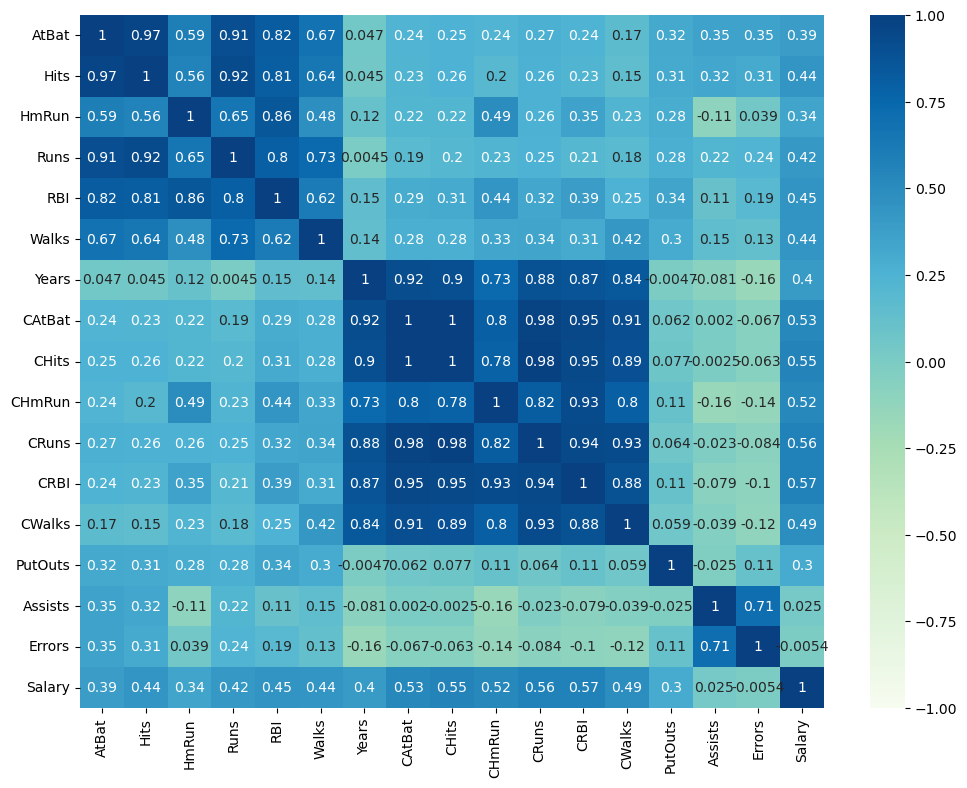

In [26]:
# Display Heat Map
plt.figure(figsize=(12,9))
sns.heatmap(df_hitters_corr.corr(),vmin=-1,vmax=1,cmap='GnBu',annot=True)
plt.show()

In [27]:
# Creat X-independent variables
x=df_hitters_num_nonull.drop('Salary',axis=1)
display(x)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,1,0,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3,1,0,1
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20,0,0,0
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7,0,1,0
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12,0,0,0


In [28]:
y=df_hitters_num_nonull['Salary']
print(y)

1       475.0
2       480.0
3       500.0
4        91.5
5       750.0
        ...  
317     700.0
318     875.0
319     385.0
320     960.0
321    1000.0
Name: Salary, Length: 263, dtype: float64


In [29]:
#Train Test Split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=360)
print(x.shape)
print(x_train.shape)
print(x_test.shape)
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(263, 19)
(170, 19)
(93, 19)
(263,)
(170,)
(93,)


In [30]:
# Standardization of X-Train
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
display(pd.DataFrame(x_train))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.498106,0.440385,-0.947043,0.275707,-0.315964,0.533540,-0.272518,-0.395014,-0.420554,-0.731358,-0.407179,-0.716004,-0.414628,-0.858247,-0.138118,-0.311152,-1.0,1.048220,-1.0
1,0.637675,0.284462,-0.390729,0.120892,-0.690017,-0.903229,-0.067527,0.312033,0.255482,-0.381708,0.030682,-0.137487,-0.340929,-0.466742,1.568324,2.817098,1.0,1.048220,1.0
2,-0.625086,-0.049660,0.276848,-0.150034,0.245114,-0.717839,-0.067527,0.139749,0.165143,-0.152626,-0.123161,0.162600,-0.255594,-0.596138,0.582820,0.826393,1.0,-0.953998,1.0
3,-0.777947,-0.807001,-0.390729,-0.807997,-0.540396,-0.625144,0.957430,0.790079,0.767403,0.317593,0.598717,0.490530,0.209869,-0.463424,-0.872285,-1.022118,-1.0,-0.953998,-1.0
4,1.601360,2.044168,2.168316,1.823855,2.115378,0.023719,-0.477509,-0.212069,-0.154054,0.293479,-0.170498,-0.016833,-0.527115,-0.088508,-0.773074,0.115427,-1.0,-0.953998,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.006294,-0.316957,0.610636,-0.188737,0.544357,1.136056,1.162421,1.100105,0.933024,2.234643,1.270301,1.749656,2.378154,-0.981007,-0.885514,-1.306504,-1.0,-0.953998,-1.0
166,-1.628648,-1.452969,0.054322,-1.272441,-0.839638,-0.856881,1.777396,1.186674,0.942058,1.366545,1.157878,1.486693,2.413064,-0.433564,-0.825986,-1.164311,-1.0,1.048220,-1.0
167,-0.964038,-0.807001,-0.501992,-0.188737,-0.615207,0.116414,1.572404,1.571328,1.428382,1.041008,1.965554,0.877239,2.199726,-0.811797,-0.528351,-0.168959,1.0,-0.953998,1.0
168,-1.090314,-1.118848,-0.613254,-0.498367,-1.213691,-0.903229,-0.477509,-0.583930,-0.577142,-0.526391,-0.558064,-0.617006,-0.573661,-0.410339,-0.878899,-0.737732,-1.0,-0.953998,-1.0


In [31]:
x_test=scaler.transform(x_test)
display(pd.DataFrame(x_test))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.026233,-0.316957,-0.056940,0.004781,-0.091533,-1.042271,-0.272518,-0.542565,-0.583164,-0.454049,-0.492976,-0.586070,-0.736573,-0.244447,-0.852443,-0.595538,-1.0,-0.953998,-1.0
1,-0.405764,-0.227858,-0.835780,-0.653182,-0.839638,-0.810534,-0.682501,-0.666234,-0.635862,-0.683131,-0.685280,-0.669599,-0.767604,-0.635952,0.523293,-0.026766,-1.0,1.048220,-1.0
2,0.272139,0.262187,1.834527,1.165892,1.292462,1.275098,0.137465,0.041240,0.056736,0.703415,0.231861,0.295628,0.217627,-0.350618,-0.872285,-1.022118,-1.0,-0.953998,-1.0
3,-0.485518,-0.851551,0.165585,-0.459663,-0.839638,0.209108,2.187378,0.564063,0.341304,0.124683,0.246654,0.171881,0.826609,1.205449,-0.534965,-0.311152,-1.0,-0.953998,-1.0
4,-1.196651,-1.163398,-0.168203,-0.924108,-0.465586,-0.439755,-0.477509,-0.614634,-0.622311,-0.333480,-0.620193,-0.527290,-0.484447,-0.815115,0.014006,1.537359,1.0,-0.953998,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,-1.070375,-1.029749,-1.280831,-0.924108,-1.512933,-0.856881,-0.272518,-0.292241,-0.304619,-0.767529,-0.134996,-0.685067,-0.178017,-0.579548,0.113218,-0.453345,-1.0,-0.953998,-1.0
89,0.052817,0.239912,-0.056940,0.469226,-0.390775,-0.300713,-1.297475,-0.945983,-0.896339,-0.683131,-0.853916,-0.876875,-0.849060,2.144397,-0.409297,0.257621,1.0,1.048220,1.0
90,0.125924,0.039439,-0.613254,0.043485,-0.577801,-0.856881,-0.887492,-0.867943,-0.848158,-0.719301,-0.812497,-0.861407,-0.860697,-0.231175,-0.839215,-0.737732,1.0,1.048220,1.0
91,1.269055,1.732321,0.944425,1.127188,1.030625,-0.115323,-0.477509,-0.399705,-0.376890,-0.333480,-0.401262,-0.400449,-0.662875,0.024298,-0.806144,-0.595538,1.0,1.048220,1.0


In [32]:
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)
print(lin_reg)

LinearRegression()


In [33]:
# Display Linear Regerssion Coefficient and Intercept
print('Linear regression coefficints are:',lin_reg.coef_)
print('Linear Regression y-intercept is:',lin_reg.intercept_)

Linear regression coefficints are: [-434.6878514   431.17058869   15.73386597  -32.63455716    3.62818035
  115.12873897  -63.2721856   -78.16526439 -164.93957809 -129.63280365
  342.18725406  453.67086058 -184.93335004   86.17512685  106.82039275
  -57.7827156    28.53987011  -57.30940053    7.95483596]
Linear Regression y-intercept is: 528.6373000000001


In [34]:
print('Linear Regression y-intercept is:',lin_reg.intercept_)

Linear Regression y-intercept is: 528.6373000000001


In [35]:
# Display Predicted Values of Test Data

lin_reg_y_pred=lin_reg.predict(x_test)
print(lin_reg_y_pred)

[ 116.00232256  317.02958755  680.28787472  248.61236278  318.24867752
 1537.44552515  547.0693292   639.63602915  186.04434689  174.13879634
  195.40497348  925.68177942  465.90040956  307.65772806  352.62917128
  333.25010555   47.19489364  993.52560868  167.86724006 1066.7722241
 1698.46417581  873.97572317 1740.92305036  717.16476542  401.42288492
  295.71573531   94.4366667   801.36608539  321.50166503  616.1651996
 1118.68998455  325.81604852  288.99648919  321.47041401  339.09071127
  338.33525155  452.46283698  650.22303381  126.30597003  273.24408453
  492.90947731  416.14369972  220.91351124 1171.32639289  340.556207
  668.92703416   12.98859992  101.76028012  689.56191193  749.09421453
  811.84073462 1312.44230566   81.9919024   347.46354547  840.91425949
  753.50310109   91.69044775  144.05145821  981.5068291   279.49921511
  820.24747436  690.09669685  283.14949656  176.39648812  392.90938251
  733.59431728  643.2583006   225.11210179  633.13176129  507.60516492
  236.6579

In [36]:
# Display Test,Predicted Test and Difference

lin_comp=pd.DataFrame({'Actual':y_test,'Predicted':lin_reg_y_pred})
lin_comp['Difference']=lin_comp['Actual']-lin_comp['Predicted']
display(lin_comp)


,Actual,Predicted,Difference
167,300.0,116.002323,183.997677
79,275.0,317.029588,-42.029588
177,1300.0,680.287875,619.712125
245,400.0,248.612363,151.387637
131,297.5,318.248678,-20.748678
...,...,...,...
13,700.0,328.067811,371.932189
314,120.0,518.925144,-398.925144
31,110.0,136.058809,-26.058809
175,630.0,589.730865,40.269135


In [37]:
300.0-116.002323	

183.997677

In [38]:
# Display RMSE,Score,Accuracy of test Data

print('Linear Regression Model RMSE is:',math.sqrt(mean_squared_error(y_test,lin_reg_y_pred)))
print('Linaer Regression Model Training Score:',lin_reg.score(x_train,y_train))
print('Linear Regression Model Test Score:',lin_reg.score(x_test,y_test))
print('Accuracy of the test Data:',r2_score(y_test,lin_reg_y_pred))

Linear Regression Model RMSE is: 322.33012176588716
Linaer Regression Model Training Score: 0.49781749422372856
Linear Regression Model Test Score: 0.5460504390619169
Accuracy of the test Data: 0.5460504390619169


In [39]:
x_array=scaler.transform(x)
print("Linear Regression Model RMSE is complete Data:",math.sqrt(mean_squared_error(y,lin_reg.predict(x_array))))
print('Linear Regression Model Complete Data:',lin_reg.score(x_array,y))
print('Accuracy of the complete Data:',r2_score(y,lin_reg.predict(x_array)))

Linear Regression Model RMSE is complete Data: 312.82141710984104
Linear Regression Model Complete Data: 0.5173127887610509
Accuracy of the complete Data: 0.5173127887610509


In [40]:
x_array=scaler.transform(x)

In [41]:
lin_comp=pd.DataFrame({'Actual':y,'Predicted':lin_reg.predict(x_array)})
lin_comp['Difference']=lin_comp['Actual']-lin_comp['Predicted']
display(lin_comp.head(50))

,Actual,Predicted,Difference
1,475.000,411.373756,63.626244
2,480.000,650.223034,-170.223034
3,500.000,1118.689985,-618.689985
4,91.500,583.118042,-491.618042
5,750.000,546.971580,203.028420
6,70.000,234.316662,-164.316662
7,100.000,134.305161,-34.305161
8,75.000,159.578921,-84.578921
9,1100.000,637.850326,462.149674
10,517.143,853.351063,-336.208063


In [42]:
print(x.dtypes)

AtBat          int64
Hits           int64
HmRun          int64
Runs           int64
RBI            int64
Walks          int64
Years          int64
CAtBat         int64
CHits          int64
CHmRun         int64
CRuns          int64
CRBI           int64
CWalks         int64
PutOuts        int64
Assists        int64
Errors         int64
League_N       int32
Division_W     int32
NewLeague_N    int32
dtype: object


In [45]:
# Dissplay OLS Method and Summary
import statsmodels.api as sm
reg_ols=sm.OLS(endog=y,exog=x)
reg_ols=reg_ols.fit()
print(reg_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Salary   R-squared (uncentered):                   0.810
Model:                            OLS   Adj. R-squared (uncentered):              0.795
Method:                 Least Squares   F-statistic:                              54.64
Date:                Fri, 24 May 2024   Prob (F-statistic):                    1.31e-76
Time:                        14:03:51   Log-Likelihood:                         -1877.9
No. Observations:                 263   AIC:                                      3794.
Df Residuals:                     244   BIC:                                      3862.
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [46]:
cv=RepeatedKFold(n_splits=5,n_repeats=3,random_state=1)
print(cv)

RepeatedKFold(n_repeats=3, n_splits=5, random_state=1)


In [47]:
# Initilising the ridge regressor

ridge=RidgeCV(alphas=np.arange(0.1,10,0.1),cv=cv,scoring='neg_mean_absolute_error')
print(ridge)

RidgeCV(alphas=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]),
        cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=1),
        scoring='neg_mean_absolute_error')


In [48]:
# Fitting the ridge regressor

ridge.fit(x_train,y_train)
ridge_reg_y_pred=ridge.predict(x_test)

In [49]:
print('Ridge tuning parameters:',(ridge.alpha_))
print('Ridge model coefficients:',(ridge.coef_))
print('Ridge model intercept:',(ridge.intercept_))

Ridge tuning parameters: 9.9
Ridge model coefficients: [-137.21114495  136.07588534  -13.69123636   35.78228841   42.19258465
   48.85589826  -35.95385972   24.32469118   79.1904334    16.14597908
   44.5063627   102.51171947  -43.16831799   79.0946724    72.61222022
  -61.84052977   26.98910436  -57.88131328    7.78082939]
Ridge model intercept: 528.6373000000001


In [50]:
print('Ridge model coefficients:',(ridge.coef_).shape)

Ridge model coefficients: (19,)


In [52]:
# Display Result (RMSE and  Score)

print('Ridge Regression Model RMSE is:',math.sqrt(mean_squared_error(y_test,ridge_reg_y_pred)))
print('Ridge Regression model Training Score:',ridge.score(x_train,y_train))
print('Ridge Regression Model Test Score:',ridge.score(x_test,y_test))
print('Ridge Regression Model Test R2_Score:',r2_score(y_test,ridge_reg_y_pred))

Ridge Regression Model RMSE is: 319.00526943547106
Ridge Regression model Training Score: 0.4623401779993642
Ridge Regression Model Test Score: 0.555367166358931
Ridge Regression Model Test R2_Score: 0.555367166358931


In [ ]:
'''Linear Regression Model RMSE is: 322.33012176588716
Linaer Regression Model Training Score: 0.49781749422372856
Linear Regression Model Test Score: 0.5460504390619169
Accuracy of the test Data: 0.5460504390619169'''

In [53]:
np.arange(0.1,1.0,0.1)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [55]:
# Initializing the lasso regressor

lasso=LassoCV(alphas=np.arange(0.1,10.0,0.1),cv=cv,tol=1)
print(lasso)

LassoCV(alphas=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]),
        cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=1), tol=1)


In [56]:
# Fitting the lasso regressor
lasso.fit(x_train,y_train)
lasso_reg_y_pred=lasso.predict(x_test)

In [57]:
# Display Lasso Parameters

print('Lasso tuning parameters:',(lasso.alpha_))
print('Lasso model coefficients:',(lasso.coef_))
print('Lasso model intercepts:',(lasso.intercept_))

Lasso tuning parameters: 1.1
Lasso model coefficients: [ 9.19944753e+01  4.84041244e+01  8.99804796e+00 -2.56154970e+00
  1.37567337e+01  3.80556353e+01  1.22019234e+02  4.70300863e+01
  1.19524361e+01 -9.65663791e-01  3.02589039e-02  4.32899323e+00
 -1.07907259e+01  6.29317626e+01  1.85655185e+01 -6.10864801e+01
  4.19427038e+01 -6.10762621e+01 -5.26059013e-01]
Lasso model intercepts: 528.6373000000001


In [58]:
print('Lasso model coefficients:',(lasso.coef_))

Lasso model coefficients: [ 9.19944753e+01  4.84041244e+01  8.99804796e+00 -2.56154970e+00
  1.37567337e+01  3.80556353e+01  1.22019234e+02  4.70300863e+01
  1.19524361e+01 -9.65663791e-01  3.02589039e-02  4.32899323e+00
 -1.07907259e+01  6.29317626e+01  1.85655185e+01 -6.10864801e+01
  4.19427038e+01 -6.10762621e+01 -5.26059013e-01]


In [59]:
lasso.coef_

array([ 9.19944753e+01,  4.84041244e+01,  8.99804796e+00, -2.56154970e+00,
        1.37567337e+01,  3.80556353e+01,  1.22019234e+02,  4.70300863e+01,
        1.19524361e+01, -9.65663791e-01,  3.02589039e-02,  4.32899323e+00,
       -1.07907259e+01,  6.29317626e+01,  1.85655185e+01, -6.10864801e+01,
        4.19427038e+01, -6.10762621e+01, -5.26059013e-01])

In [62]:
ridge.coef_

array([-137.21114495,  136.07588534,  -13.69123636,   35.78228841,
         42.19258465,   48.85589826,  -35.95385972,   24.32469118,
         79.1904334 ,   16.14597908,   44.5063627 ,  102.51171947,
        -43.16831799,   79.0946724 ,   72.61222022,  -61.84052977,
         26.98910436,  -57.88131328,    7.78082939])

In [63]:
len(ridge.coef_)

19

In [60]:
len(lasso.coef_)

19

In [61]:
# Display Lasso Result

print("Lasso Regression Model RMSE is:",math.sqrt(mean_squared_error(y_test,lasso_reg_y_pred)))
print("Lasso Regression Model Training Score:",lasso.score(x_train,y_train))
print("Lasso Regression Model Test Score:",lasso.score(x_test,y_test))

Lasso Regression Model RMSE is: 338.23696196332213
Lasso Regression Model Training Score: 0.3732326989751892
Lasso Regression Model Test Score: 0.5001405056513015


In [ ]:
'''Ridge Regression Model RMSE is: 319.00526943547106
Ridge Regression model Training Score: 0.4623401779993642
Ridge Regression Model Test Score: 0.555367166358931
Ridge Regression Model Test R2_Score: 0.555367166358931'''

In [ ]:
'''Linear Regression Model RMSE is: 322.33012176588716
Linaer Regression Model Training Score: 0.49781749422372856
Linear Regression Model Test Score: 0.5460504390619169
Accuracy of the test Data: 0.5460504390619169'''

In [64]:
# Comparison of Result Linear,Ridge and Lasso Regression

print('Liear Regression Model Training Score:',lin_reg.score(x_train,y_train))
print('Linear Regression Model Test Score:',lin_reg.score(x_test,y_test))
print('Ridge Regression Model Training Score:',ridge.score(x_train,y_train))
print('Ridge Regression Model Test Score:',ridge.score(x_test,y_test))
print('Lasso Regression Model Training Score:',lasso.score(x_train,y_train))
print('Lasso Regression Model Test Score:',lasso.score(x_test,y_test))

Liear Regression Model Training Score: 0.49781749422372856
Linear Regression Model Test Score: 0.5460504390619169
Ridge Regression Model Training Score: 0.4623401779993642
Ridge Regression Model Test Score: 0.555367166358931
Lasso Regression Model Training Score: 0.3732326989751892
Lasso Regression Model Test Score: 0.5001405056513015


In [65]:
# Comparison of Result Linear,Ridge,Lasso Regression (RMSE)

print("Linear Regression Model RMSE is:",math.sqrt(mean_squared_error(y_test,lin_reg_y_pred)))
print("Ridge Regression Model RMSE is:",math.sqrt(mean_squared_error(y_test,ridge_reg_y_pred)))
print('Lasso Regression Model RMSE is:',math.sqrt(mean_squared_error(y_test,lasso_reg_y_pred)))      

Linear Regression Model RMSE is: 322.33012176588716
Ridge Regression Model RMSE is: 319.00526943547106
Lasso Regression Model RMSE is: 338.23696196332213


In [68]:
# Get all record where Salary is Null

df_hitters_nan=df_hitters_num[df_hitters_num['Salary'].isnull()]
display(df_hitters_nan.shape)
display(df_hitters_nan)

(59, 20)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN,0,0,0
15,183,39,3,20,15,11,3,201,42,3,20,16,11,118,0,0,NaN,0,1,0
18,407,104,6,57,43,65,12,5233,1478,100,643,658,653,912,88,9,NaN,0,1,0
22,22,10,1,4,2,1,6,84,26,2,9,9,3,812,84,11,NaN,0,1,0
30,313,84,9,42,30,39,17,6890,1833,224,1033,864,1087,127,221,7,NaN,0,1,0
32,517,141,27,70,87,52,9,3571,994,215,545,652,337,1378,102,8,NaN,1,1,1
36,161,36,0,19,10,17,4,1053,244,3,156,86,107,70,149,12,NaN,0,0,0
38,346,98,5,31,53,30,16,5913,1615,235,784,901,560,0,0,0,NaN,0,0,0
39,241,61,1,34,12,14,1,241,61,1,34,12,14,166,172,10,NaN,1,1,1
41,216,54,0,21,18,15,18,7318,1926,46,796,627,483,103,84,5,NaN,1,1,1


In [69]:
# Creat x by dropping Null salary columns
x_nan=df_hitters_nan.drop('Salary',axis=1)
display(x_nan)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,0,0,0
15,183,39,3,20,15,11,3,201,42,3,20,16,11,118,0,0,0,1,0
18,407,104,6,57,43,65,12,5233,1478,100,643,658,653,912,88,9,0,1,0
22,22,10,1,4,2,1,6,84,26,2,9,9,3,812,84,11,0,1,0
30,313,84,9,42,30,39,17,6890,1833,224,1033,864,1087,127,221,7,0,1,0
32,517,141,27,70,87,52,9,3571,994,215,545,652,337,1378,102,8,1,1,1
36,161,36,0,19,10,17,4,1053,244,3,156,86,107,70,149,12,0,0,0
38,346,98,5,31,53,30,16,5913,1615,235,784,901,560,0,0,0,0,0,0
39,241,61,1,34,12,14,1,241,61,1,34,12,14,166,172,10,1,1,1
41,216,54,0,21,18,15,18,7318,1926,46,796,627,483,103,84,5,1,1,1


In [70]:
# Salary Column,Where all salary Values are Null
y_nan=df_hitters_nan['Salary']
print(y_nan)

0     NaN
15    NaN
18    NaN
22    NaN
30    NaN
32    NaN
36    NaN
38    NaN
39    NaN
41    NaN
42    NaN
44    NaN
48    NaN
52    NaN
57    NaN
64    NaN
66    NaN
69    NaN
71    NaN
77    NaN
80    NaN
83    NaN
94    NaN
97    NaN
101   NaN
103   NaN
104   NaN
105   NaN
106   NaN
114   NaN
125   NaN
138   NaN
144   NaN
150   NaN
157   NaN
158   NaN
160   NaN
169   NaN
171   NaN
173   NaN
197   NaN
199   NaN
203   NaN
208   NaN
210   NaN
225   NaN
228   NaN
235   NaN
246   NaN
250   NaN
253   NaN
254   NaN
270   NaN
283   NaN
292   NaN
298   NaN
302   NaN
305   NaN
316   NaN
Name: Salary, dtype: float64


In [71]:
len(y_nan)

59

In [72]:
# Standardisation of Data

scaler=StandardScaler()
x_nan=scaler.fit_transform(x_nan)

In [74]:
# Predict salary for records where salary is Null

nan_pred=ridge.predict(x_nan)
print(nan_pred)

[ 166.86764583  145.32875164  921.94076838  228.46618329  847.55375101
 1203.46715287  301.21954445  856.94706981  329.69584403  661.87521152
  380.42619014  590.20852949 1192.33481283  184.7416018   633.70455323
   88.29657188  346.76559795  682.14873566  425.73873133  490.71014897
  874.23986896  187.56870578  481.17424505  700.26045856  640.31481118
  688.14003682 1012.64648257  162.2990073   325.77276308  944.87876821
  565.57548975  483.24950821  577.01077035  310.42257772  464.01531486
  647.02293454  229.49568507  425.94926645  362.44926308  304.42204256
  340.55909165  545.37134727  389.83046931  572.76638843  416.29435014
  517.9514981   502.27626471 1061.59607529  793.14379677   97.91246095
  237.75443998  415.30016466  340.38042258  135.60253205  858.60602493
  296.92817652 1109.78405519 1035.59361027  456.60413498]


In [75]:
display(nan_pred)

array([ 166.86764583,  145.32875164,  921.94076838,  228.46618329,
        847.55375101, 1203.46715287,  301.21954445,  856.94706981,
        329.69584403,  661.87521152,  380.42619014,  590.20852949,
       1192.33481283,  184.7416018 ,  633.70455323,   88.29657188,
        346.76559795,  682.14873566,  425.73873133,  490.71014897,
        874.23986896,  187.56870578,  481.17424505,  700.26045856,
        640.31481118,  688.14003682, 1012.64648257,  162.2990073 ,
        325.77276308,  944.87876821,  565.57548975,  483.24950821,
        577.01077035,  310.42257772,  464.01531486,  647.02293454,
        229.49568507,  425.94926645,  362.44926308,  304.42204256,
        340.55909165,  545.37134727,  389.83046931,  572.76638843,
        416.29435014,  517.9514981 ,  502.27626471, 1061.59607529,
        793.14379677,   97.91246095,  237.75443998,  415.30016466,
        340.38042258,  135.60253205,  858.60602493,  296.92817652,
       1109.78405519, 1035.59361027,  456.60413498])

In [79]:
# Update salary column with Predicted Salary
df_nan_full=df_hitters_nan.copy()
df_nan_full['Salary']=nan_pred
print(df_nan_full.shape)
display(df_nan_full)

(59, 20)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,166.867646,0,0,0
15,183,39,3,20,15,11,3,201,42,3,20,16,11,118,0,0,145.328752,0,1,0
18,407,104,6,57,43,65,12,5233,1478,100,643,658,653,912,88,9,921.940768,0,1,0
22,22,10,1,4,2,1,6,84,26,2,9,9,3,812,84,11,228.466183,0,1,0
30,313,84,9,42,30,39,17,6890,1833,224,1033,864,1087,127,221,7,847.553751,0,1,0
32,517,141,27,70,87,52,9,3571,994,215,545,652,337,1378,102,8,1203.467153,1,1,1
36,161,36,0,19,10,17,4,1053,244,3,156,86,107,70,149,12,301.219544,0,0,0
38,346,98,5,31,53,30,16,5913,1615,235,784,901,560,0,0,0,856.947070,0,0,0
39,241,61,1,34,12,14,1,241,61,1,34,12,14,166,172,10,329.695844,1,1,1
41,216,54,0,21,18,15,18,7318,1926,46,796,627,483,103,84,5,661.875212,1,1,1
